In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('tendulkar_ODI.csv')
df.tail()


,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
290,291,18,21,14,2,0,128.57,2,caught,2,v Sri Lanka,Mumbai,2-Apr-11
291,292,2,9,6,0,0,33.33,2,caught,2,v Australia,Melbourne,5-Feb-12
292,293,3,21,12,0,0,25,2,caught,2,v Australia,Brisbane,19-Feb-12
293,294,14,34,15,2,0,93.33,2,run out,2,v Australia,Sydney,26-Feb-12
294,295,114,205,147,12,1,77.55,2,caught,1,v Bangladesh,Dhaka,16-Mar-12


In [9]:
df['Runs'].unique()

array(['0', '36', '19', '31', '53', '30', 'DNB', '4', '62', '1', '57',
       '21', '69', '11', '84', '39', '15', '10', '22', '32', '23', '82*',
       '3', '24', '5', '34', '8*', '25', '26*', '2', '28*', '11*', '52',
       '82', '63', '40', '6', '8', '115', '66', '54', '88', '105', '13',
       '7', '65', '127*', '70', '90', '137', '110', '64', '28', '67',
       '114', '14', '45', '44', '65*', '9', '117', '27', '100', '33',
       '18', '100*', '17', '128', '29', '37', '120', '186*', '12', '26',
       '122', '93', '146', '35', '139', '70*', '101', '38', '68', '87*',
       '34*', '81', '89', '102', '86', '141', '74', '16', '47', '123',
       '67*', '42', '95', '55', '60', 'TDNB', '99', '71', '94', '43',
       '79', '72', '97', '117*', '91', '50', '20', '163*', '138', '175',
       '96*', '200*', '111', '85'], dtype=object)

In [10]:
df["Runs"]=df["Runs"].str.replace("*", "").str.replace("TDNB","0").str.replace('DNB','0').astype("int64")
df['Runs'].unique()

array([  0,  36,  19,  31,  53,  30,   4,  62,   1,  57,  21,  69,  11,
        84,  39,  15,  10,  22,  32,  23,  82,   3,  24,   5,  34,   8,
        25,  26,   2,  28,  52,  63,  40,   6, 115,  66,  54,  88, 105,
        13,   7,  65, 127,  70,  90, 137, 110,  64,  67, 114,  14,  45,
        44,   9, 117,  27, 100,  33,  18,  17, 128,  29,  37, 120, 186,
        12, 122,  93, 146,  35, 139, 101,  38,  68,  87,  81,  89, 102,
        86, 141,  74,  16,  47, 123,  42,  95,  55,  60,  99,  71,  94,
        43,  79,  72,  97,  91,  50,  20, 163, 138, 175,  96, 200, 111,
        85], dtype=int64)

In [15]:
df["4s"] = df["Runs"].astype("int64")
df["4s"].unique()

array([  0,  36,  19,  31,  53,  30,   4,  62,   1,  57,  21,  69,  11,
        84,  39,  15,  10,  22,  32,  23,  82,   3,  24,   5,  34,   8,
        25,  26,   2,  28,  52,  63,  40,   6, 115,  66,  54,  88, 105,
        13,   7,  65, 127,  70,  90, 137, 110,  64,  67, 114,  14,  45,
        44,   9, 117,  27, 100,  33,  18,  17, 128,  29,  37, 120, 186,
        12, 122,  93, 146,  35, 139, 101,  38,  68,  87,  81,  89, 102,
        86, 141,  74,  16,  47, 123,  42,  95,  55,  60,  99,  71,  94,
        43,  79,  72,  97,  91,  50,  20, 163, 138, 175,  96, 200, 111,
        85], dtype=int64)

In [26]:
dfc=pd.read_csv('currencies.csv')
dfc

,Currency,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
0,"July 01, 2016",9.29446,1.25367,143.645,1.05054,1.39596,NaN,1.87126,0.524882,NaN,...,20.3528,202.763,11.8246,1.36009,NaN,9.28428,3.06035,5.12668,NaN,13.9247
1,"July 05, 2016",9.31515,1.25322,142.715,1.06143,1.39684,154.063,1.85825,0.525213,15.2162,...,20.6240,202.886,11.7627,1.35689,49.0655,9.26724,NaN,5.12992,42.9026,13.9335
2,"July 06, 2016",9.31697,1.25834,140.540,1.07300,1.39286,154.094,1.87313,0.523717,15.2392,...,20.7232,NaN,11.8805,1.36208,49.0692,9.25643,NaN,5.11527,42.6425,13.8938
3,"July 07, 2016",9.31315,1.25737,140.640,1.06911,1.39316,153.957,1.85236,0.523829,15.1430,...,20.4288,202.351,11.9192,1.36098,49.0295,NaN,NaN,5.11637,42.4176,13.8968
4,"July 08, 2016",9.31350,1.25797,140.510,1.07261,1.39257,154.062,1.85974,0.523607,15.1202,...,20.6063,202.271,11.9327,1.36472,49.0408,9.26432,NaN,5.11423,42.2060,13.8909
5,"July 11, 2016",9.29403,1.25769,139.962,1.07050,1.38962,153.742,1.83836,0.522496,15.0067,...,20.0773,201.842,11.9439,1.36641,48.7950,9.23745,3.07068,5.10337,NaN,13.8614
6,"July 12, 2016",9.31021,1.25490,143.369,1.05762,1.39194,153.869,1.83439,0.523368,14.9510,...,19.9238,202.179,11.8614,1.36674,48.9182,9.28617,3.07901,5.11187,NaN,13.8845
7,"July 13, 2016",9.31350,1.25716,145.178,1.04680,1.39193,153.855,1.83101,0.523366,14.9509,...,19.9273,202.175,11.9234,1.37063,48.9958,9.29005,3.06884,5.11187,42.1644,13.8845
8,"July 14, 2016",9.30432,1.24695,144.895,1.05236,1.39122,153.763,1.82791,0.523097,14.9112,...,19.8519,202.074,11.8098,1.36326,48.8873,9.29990,NaN,5.10926,NaN,13.8774
9,"July 15, 2016",9.31532,1.25263,147.268,1.04242,1.39392,NaN,1.82786,0.524115,14.9723,...,20.0040,202.467,11.8409,1.36451,48.7607,9.31437,NaN,5.11917,42.0267,13.9044


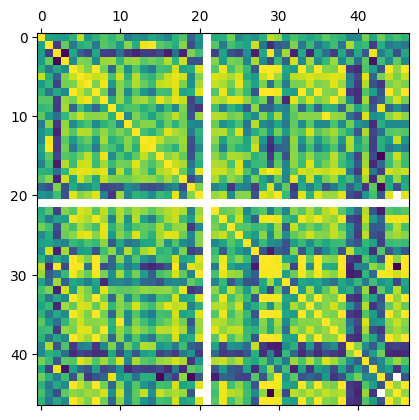

In [28]:
plt.matshow(dfc.corr())
plt.show()

In [30]:
corr = dfc.corr()
corr.style.background_gradient(cmap='coolwarm')

,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,Brazilian Real,Brunei Dollar,Canadian Dollar,Chilean Peso,Czech Koruna,Danish Krone,Hungarian Forint,Icelandic Krona,Indian Rupee,Israeli New Sheqel,Kazakhstani Tenge,Kuwaiti Dinar,Libyan Dinar,Malaysian Ringgit,Mauritian Rupee,Mexican Peso,Nepalese Rupee,New Zealand Dollar,Norwegian Krone,Rial Omani,Pakistani Rupee,Nuevo Sol,Philippine Peso,Polish Zloty,Qatar Riyal,Russian Ruble,Saudi Arabian Riyal,Singapore Dollar,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
Chinese Yuan,1.000000,0.151596,0.117566,0.108695,0.291582,0.815216,0.077983,0.291926,0.467693,0.320508,0.499400,-0.186643,0.028821,-0.000742,0.190088,0.092517,-0.094406,0.304050,0.442994,-0.349278,0.051050,nan,0.235758,0.273543,0.585242,-0.048039,0.158424,0.011336,0.291726,0.808891,0.690147,0.161906,0.415765,0.291630,0.184050,0.291155,0.499400,0.356889,0.296118,-0.044773,-0.069368,0.585148,0.215925,0.542852,0.291300,0.421574,0.292168
Euro,0.151596,1.000000,-0.645719,0.531150,-0.210587,0.259964,0.331588,-0.209926,0.469668,0.383645,0.103766,0.638422,0.242743,0.952136,0.997624,0.500416,0.409634,0.243851,0.643255,-0.522276,-0.029612,nan,0.462882,-0.183599,0.406158,0.247677,0.169274,0.848789,-0.209931,-0.759606,-0.425412,-0.314072,0.609706,-0.210148,0.348002,-0.210800,0.103766,0.382248,-0.234048,0.756618,0.277528,0.370282,-0.621466,0.257016,-0.210770,-0.047889,-0.210364
Japanese Yen,0.117566,-0.645719,1.000000,-0.970308,0.210295,-0.388099,-0.582032,0.209957,-0.627015,-0.641122,-0.260258,-0.662233,-0.809751,-0.629068,-0.668736,-0.572344,-0.834549,-0.270123,-0.798265,0.610230,0.376778,nan,-0.602250,0.167648,-0.497609,-0.602069,0.008359,-0.818583,0.209915,0.977676,-0.149566,0.717931,-0.806694,0.210217,-0.774645,0.209975,-0.260258,-0.629790,0.216936,-0.484786,0.209928,-0.458043,0.952893,-0.147436,0.210296,-0.513065,0.210351
U.K. Pound Sterling,0.108695,0.531150,-0.970308,1.000000,-0.042303,0.613186,0.579213,-0.042220,0.689069,0.731765,0.325791,0.670759,0.702740,0.491249,0.564435,0.486629,0.760730,0.314681,0.846940,-0.497732,-0.492609,nan,0.623274,0.115298,0.586498,0.551789,-0.105797,0.728907,-0.042119,-0.550338,0.330242,-0.389512,0.866656,-0.042458,0.724416,-0.042236,0.325791,0.691677,-0.063891,0.439605,-0.274110,0.484703,-0.884769,0.379161,-0.042522,0.512847,-0.042480
U.S. Dollar,0.291582,-0.210587,0.210295,-0.042303,1.000000,0.822036,0.607010,0.999999,0.580842,-0.340426,0.645133,-0.025276,0.465683,0.063391,-0.182763,0.401028,0.367329,0.872862,0.164293,0.238602,0.902196,nan,0.470035,0.946580,0.403862,0.641744,0.350211,-0.474763,1.000000,0.997159,0.963550,0.203239,0.124429,0.999999,0.521178,0.999999,0.645133,0.596483,0.999985,-0.671798,-0.734504,0.457371,0.135467,-0.481887,0.999999,0.665831,0.999999
Algerian Dinar,0.815216,0.259964,-0.388099,0.613186,0.822036,1.000000,0.908465,0.822349,0.883366,0.401592,0.851882,0.295338,0.774855,0.406637,0.311716,0.570454,0.837613,0.923232,0.853723,-0.063087,0.617849,nan,0.892976,0.848173,0.740673,0.891683,0.246243,0.092266,0.822413,0.982313,0.726759,0.124527,0.783491,0.822200,0.885316,0.821995,0.851882,0.910574,0.872504,-0.157963,-0.561866,0.917543,-0.321122,0.600139,0.821881,0.601316,0.822238
Australian Dollar,0.077983,0.331588,-0.582032,0.579213,0.607010,0.908465,1.000000,0.607349,0.957234,0.071958,0.641138,0.422272,0.761295,0.532192,0.369431,0.810955,0.855761,0.921475,0.602386,0.005796,0.727243,nan,0.824098,0.745382,0.573500,0.938209,0.429160,0.155883,0.607400,-0.250614,0.529584,-0.158866,0.592071,0.607177,0.855181,0.607159,0.641138,0.913906,0.687806,-0.067537,-0.651600,0.769542,-0.504815,-0.677335,0.607053,0.710815,0.607077
Bahrain Dinar,0.291926,-0.209926,0.209957,-0.042220,0.999999,0.822349,0.607349,1.000000,0.581435,-0.340569,0.645139,-0.025220,0.465498,0.064013,-0.182083,0.401776,0.367306,0.873195,0.16449